In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from  sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn import preprocessing 
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import matplotlib.pyplot as plt 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing dataset from google drive

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link ="https://drive.google.com/open?id=1b8cohg1rRM2Cdy6nqFxKKVr5CPxU_9tJ"  
fluff, id = link.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Energy Data Set - Sheet1.csv')   

In [0]:
energy1=pd.read_csv("Energy Data Set - Sheet1.csv")

 **DATA ANALYSIS**





In [0]:
energy1.head()

,Year,GDP (Constant LCU) - may 2018,Population,Export (Constant LCU) - may 2018,Import (Constant LCU) - may 2018,Primary Energy Production (million metric tons of oil eq.),Electric Power Consumption (kWh per capita),CO2 Emissions total (kt),Energy use (kg of oil equivalent per capita),Electricity generation by Biomass and Waste (kwh),Electricity generation by (kWh) Coal,Electricity generation by (kWh) Gas,Electricity generation by (kWh) Geothermal,Electricity generation by (kWh) Hydroelectric,Electricity generation by (kWh) Nuclear,Electricity generation by (kWh) Oil,Electricity generation by (kWh) Solar Tide Wave,Electricity generation by (kWh) Wind,Total electricity Production (kWh),"Energy imports, net (% of energy use)",Fossil fuel energy consumption (% of total),Power Generation Capacities (kW) Biomass and Waste,Power Generation Capacities (kW) Fossil Fuels,Power Generation Capacities (kW) Hydroelectric,Power Generation Capacities (kW) Nuclear,Power Generation Capacities (kW) Solar Tide Wave,Power Generation Capacities (kW) Wind,Total Power Generation Capacities (kW)
0,1960,6762527811600,449480608,293247312000,491436781700,0.0,0.0,120581.961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0
1,1961,7014279310800,458494963,292702243800,443492695200,0.0,0.0,130402.187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0
2,1962,7219876797200,467852537,291005064800,460829780000,0.0,0.0,143467.708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0
3,1963,7652661717400,477527970,315461357100,476461074600,0.0,0.0,154083.673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0
4,1964,8223010778200,487484535,294918356800,492564233300,0.0,0.0,150647.694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0


In [0]:
energy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 28 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Year                                                         57 non-null     int64  
 1   GDP (Constant LCU) - may 2018                                57 non-null     int64  
 2   Population                                                   57 non-null     int64  
 3   Export (Constant LCU) - may 2018                             57 non-null     int64  
 4   Import (Constant LCU) - may 2018                             57 non-null     int64  
 5   Primary Energy Production (million metric tons of oil eq.)   53 non-null     float64
 6   Electric Power Consumption (kWh per capita)                  56 non-null     float64
 7   CO2 Emissions total (kt)                                     55 non-null     float

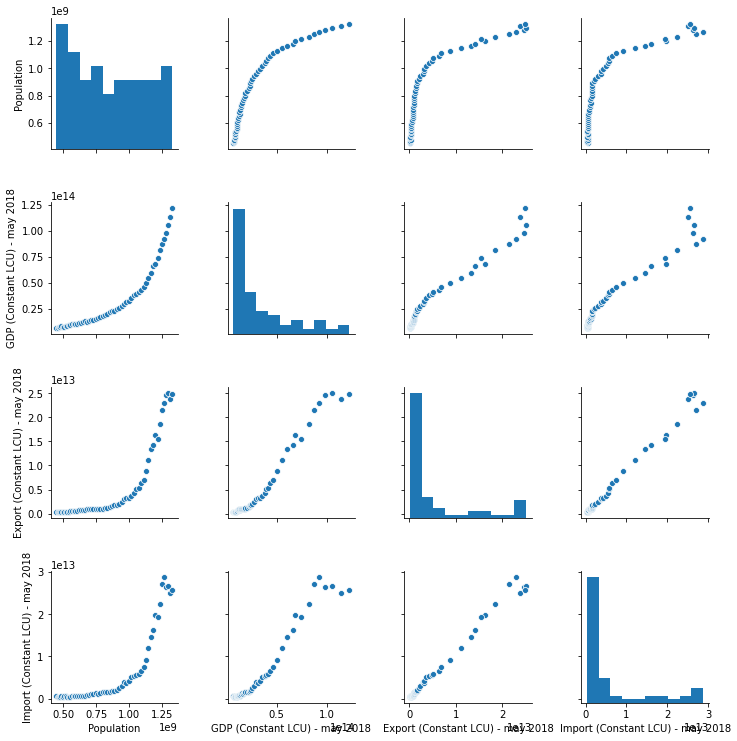

In [0]:
energy2= energy1[[ "Population","GDP (Constant LCU) - may 2018","Export (Constant LCU) - may 2018","Import (Constant LCU) - may 2018"]]
energy2.head()
sns.pairplot(energy2)

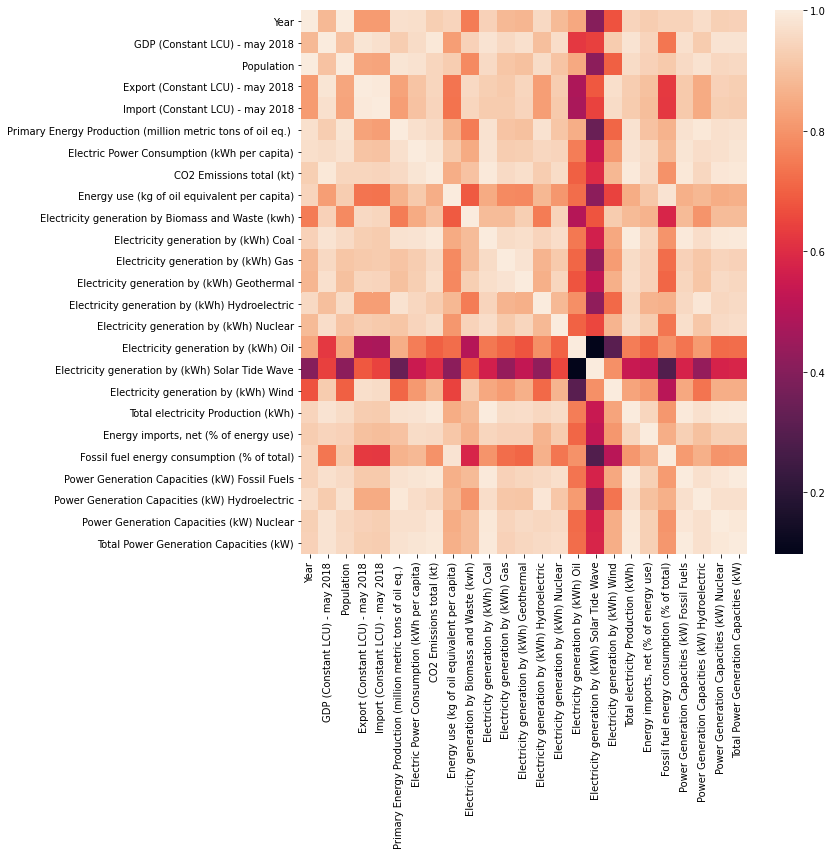

In [0]:
plt.subplots(figsize=(10,10))
sns.heatmap(energy1.corr())

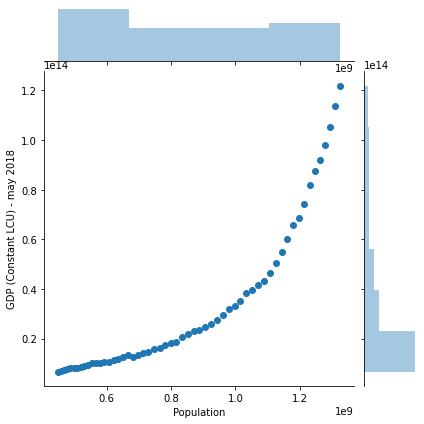

In [0]:
# m= sns.PairGrid(energy1)
# m.map(plt.scatter)
sns.jointplot(x="Population",y="GDP (Constant LCU) - may 2018", data=energy1 , kind="scatter")

In [0]:
energy=energy1.fillna(energy1.mean())           #   filling Nan values with mean value of the column.

In [0]:
X= energy.drop("GDP (Constant LCU) - may 2018", axis=1)

In [0]:
Y=energy['GDP (Constant LCU) - may 2018']


In [0]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X,Y,random_state=0)


x_train1.drop("Power Generation Capacities (kW) Biomass and Waste",axis=1,inplace=True)
x_train1.drop("Power Generation Capacities (kW) Solar Tide Wave",axis=1,inplace=True)
x_train1.drop("Power Generation Capacities (kW) Wind",axis=1,inplace=True)

x_test1.drop("Power Generation Capacities (kW) Biomass and Waste",axis=1,inplace=True)
x_test1.drop("Power Generation Capacities (kW) Solar Tide Wave",axis=1,inplace=True)
x_test1.drop("Power Generation Capacities (kW) Wind",axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


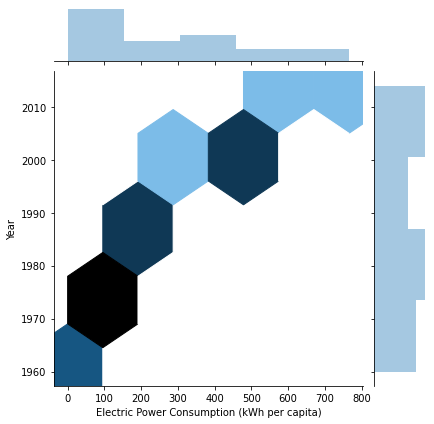

In [0]:
yyy =pd.concat([x_train1,Y],axis=1)
sns.jointplot(x='Electric Power Consumption (kWh per capita)',y='Year',data=yyy,kind='hex',bins=300)

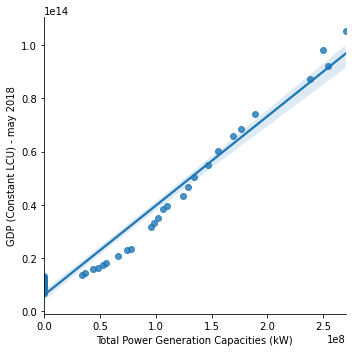

In [0]:
sns.lmplot(x='Total Power Generation Capacities (kW)',y='GDP (Constant LCU) - may 2018',data=yyy)

In [0]:
x_train1.head(10)                    # before normalizing

,Year,Population,Export (Constant LCU) - may 2018,Import (Constant LCU) - may 2018,Primary Energy Production (million metric tons of oil eq.),Electric Power Consumption (kWh per capita),CO2 Emissions total (kt),Energy use (kg of oil equivalent per capita),Electricity generation by Biomass and Waste (kwh),Electricity generation by (kWh) Coal,Electricity generation by (kWh) Gas,Electricity generation by (kWh) Geothermal,Electricity generation by (kWh) Hydroelectric,Electricity generation by (kWh) Nuclear,Electricity generation by (kWh) Oil,Electricity generation by (kWh) Solar Tide Wave,Electricity generation by (kWh) Wind,Total electricity Production (kWh),"Energy imports, net (% of energy use)",Fossil fuel energy consumption (% of total),Power Generation Capacities (kW) Fossil Fuels,Power Generation Capacities (kW) Hydroelectric,Power Generation Capacities (kW) Nuclear,Total Power Generation Capacities (kW)
40,2000,1053050912,5018417244000,5673720522700,259.55400,393.373199,1031853.463,418.684280,1.340000e+09,3.635800e+11,5.260000e+10,4.860000e+09,7.371000e+10,1.406000e+10,2.264000e+10,0.000000e+00,1.680000e+09,5.344700e+11,20.445540,63.727395,8.251000e+07,25139999.39,2500000.000,1.101500e+08
37,1997,997405318,3160648066900,4195606779700,241.14400,361.092501,917685.085,398.770520,0.000000e+00,2.997900e+11,3.761000e+10,2.600000e+09,7.391000e+10,1.045000e+10,1.835000e+10,0.000000e+00,1.030000e+09,4.437400e+11,14.934122,61.773290,7.518000e+07,21889999.39,1649999.976,9.872000e+07
7,1967,518889779,335516132600,541278689800,0.00000,0.000000,172238.990,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.00,0.000,0.000000e+00
14,1974,607050255,554547158900,518995164600,0.00000,100.922518,231992.755,273.500780,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.081815,36.467457,0.000000e+00,0.00,0.000,0.000000e+00
31,1991,888054875,1717414104300,1674074651800,183.26700,273.046613,658189.830,358.661866,0.000000e+00,2.012300e+11,1.255000e+10,1.040000e+09,7.204000e+10,5.170000e+09,9.260000e+09,0.000000e+00,3.000000e+07,3.013200e+11,8.797443,55.063492,5.735000e+07,19190000.53,1320000.052,7.786000e+07
28,1988,834489322,1258778444200,1586253482000,162.00700,220.999760,527563.956,335.450317,0.000000e+00,1.547900e+11,3.380000e+09,9.600000e+08,5.729000e+10,5.190000e+09,8.760000e+09,0.000000e+00,0.000000e+00,2.303700e+11,6.184235,51.249049,4.719000e+07,18309999.47,1149999.976,6.665000e+07
46,2006,1161977719,13403501898300,14662297913600,334.70700,469.453923,1303717.509,467.545758,1.940000e+09,4.806800e+11,7.473000e+10,6.650000e+09,1.125800e+11,1.559000e+10,1.805000e+10,1.000000e+07,8.690000e+09,7.189200e+11,23.469242,66.805891,1.078200e+08,36630001.07,3569999.933,1.554000e+08
51,2011,1247236029,21439310000000,27155540000000,406.10200,642.111615,1841776.419,579.408743,4.000000e+09,6.720500e+11,1.020200e+11,9.370000e+09,1.421400e+11,2.894000e+10,1.148000e+10,8.200000e+08,2.600000e+10,9.968200e+11,29.382042,71.471719,1.710900e+08,42380001.07,4389999.866,2.378800e+08
18,1978,665502284,804366151600,682669682900,0.00000,126.630124,283096.067,280.219429,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.484055,37.217702,0.000000e+00,0.00,0.000,0.000000e+00
54,2014,1293859294,25121757666100,26676575532700,149.11966,765.563846,2238377.137,637.428630,4.120000e+09,7.999600e+11,8.903000e+10,1.013000e+10,1.294800e+11,3.323000e+10,1.144000e+10,5.680000e+09,3.499000e+10,1.118060e+12,34.305524,73.463416,1.922900e+08,42799999.24,5300000.191,2.700900e+08


**Normalizing X (both train and test)**

In [0]:
scaler= StandardScaler()            # Normalizing the data

In [0]:
x1=scaler.fit_transform(x_train1)
x2=scaler.transform(x_test1)

In [0]:
x_train= pd.DataFrame(data=x1)            # converting numpy.ndarray to pandas dataframe. ** 
x_train

x_test=pd.DataFrame(data=x2)
x_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.458819,0.427218,-0.310930,-0.276264,0.609664,0.351905,0.124993,0.385562,-0.609985,0.229643,-0.065759,-0.151880,0.420329,-0.171256,0.240057,-0.279997,-0.449791,0.191648,0.040987,0.640730,0.283692,0.266584,0.130009,0.213789
1,0.397643,0.359548,-0.409316,-0.373467,0.651307,0.257713,0.047879,0.309174,-0.609985,0.106321,-0.255195,-0.230806,0.634112,-0.356093,0.154687,-0.279997,-0.484386,0.106108,-0.043561,0.560446,0.237517,0.256291,0.013045,0.176407
2,0.825874,0.838138,-0.014715,-0.038288,0.782725,0.590229,0.503043,0.555357,0.722223,0.643819,0.591180,0.924902,0.443562,1.079054,1.554024,-0.270566,-0.263841,0.634972,0.733506,0.789631,0.618029,0.605640,0.597865,0.527302
3,-0.030588,-0.104745,-0.564280,-0.549746,0.046060,-0.255267,-0.407002,0.048060,-0.609985,-0.324874,-0.694390,-0.574700,-0.109972,-0.353969,0.024775,-0.279997,-0.506008,-0.344092,-0.659669,0.221511,-0.229357,0.061350,-0.233195,-0.200225
4,-1.009401,-1.032386,-0.661675,-0.653673,-1.091510,-1.202642,-0.872358,-0.264522,-0.609985,-0.913923,-0.799690,-0.774835,-1.111534,-0.857492,-1.073909,-0.279997,-0.506008,-0.935294,-0.283621,-0.370984,-0.945745,-1.083846,-0.941135,-0.945891
5,-1.559984,-1.396575,-0.683330,-0.665353,-1.091510,-1.202642,-0.975110,-1.737326,-0.609985,-0.913923,-0.799690,-0.774835,-1.111534,-0.857492,-1.073909,-0.279997,-0.506008,-0.935294,-1.245902,-1.799766,-0.945745,-1.083846,-0.941135,-0.945891
6,0.336467,0.292367,-0.445475,-0.437178,0.392925,0.184287,-0.019688,0.272205,-0.609985,0.060348,-0.355204,-0.467585,0.375569,-0.231806,0.064367,-0.279997,-0.496278,0.027924,-0.064495,0.517415,0.166546,0.227339,0.019201,0.120151
7,1.743511,1.773649,2.639548,2.274888,0.002932,-0.003628,-0.050636,-0.040517,-0.092673,-0.039792,-0.066774,-0.063113,-0.013030,-0.062941,-0.023951,-0.064123,-0.074314,-0.041680,-0.067608,-0.020991,-0.029327,-0.023856,-0.038666,-0.032980
8,-0.336467,-0.426554,-0.588873,-0.595479,-0.287286,-0.511021,-0.635625,-0.094628,-0.609985,-0.587225,-0.747834,-0.755103,-0.081837,-0.642910,-0.153390,-0.279997,-0.506008,-0.540669,-0.599960,-0.049370,-0.512903,-0.192781,-0.430187,-0.455766
9,1.682335,1.717682,2.494402,2.207371,0.002932,2.454238,-0.050636,-0.040517,-0.092673,-0.039792,-0.066774,-0.063113,-0.013030,-0.062941,-0.023951,-0.064123,-0.074314,-0.041680,-0.067608,-0.020991,-0.029327,-0.023856,-0.038666,-0.032980


**Normalizing Y**


In [0]:
scaler2=preprocessing.MinMaxScaler()

In [0]:
#y_train2=pd.DataFrame(data=y_train1)
#y_test2=pd.DataFrame(data=y_test1)


y_train2=y_train1.to_numpy()                            #  converting pandas series to numpy array. 
y_test2=y_test1.to_numpy()

y_train3=scaler2.fit_transform(y_train2.reshape(-1,1))
y_test3=scaler2.transform(y_test2.reshape(-1,1))

# y1=pd.DataFrame(data=y_train)
# y2=pd.DataFrame(data=y_test)

y3=y_train3.ravel()
y4=y_test3.ravel()

# y3.shape
# type(y3)

y_train = pd.Series(y3)                           # converting numpy array to pandas Series. 
y_test = pd.Series(y4)



**Vairable names of final data -->  x_train, x_test, y_train, y_test**

In [0]:
# x_train ,x_test ,y_train1, y_test1

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(x_test)
print(y_test)

(42, 24)
(15, 24)
(42,)
(15,)
          0         1         2   ...        21        22        23
0   0.458819  0.427218 -0.310930  ...  0.266584  0.130009  0.213789
1   0.397643  0.359548 -0.409316  ...  0.256291  0.013045  0.176407
2   0.825874  0.838138 -0.014715  ...  0.605640  0.597865  0.527302
3  -0.030588 -0.104745 -0.564280  ...  0.061350 -0.233195 -0.200225
4  -1.009401 -1.032386 -0.661675  ... -1.083846 -0.941135 -0.945891
5  -1.559984 -1.396575 -0.683330  ... -1.083846 -0.941135 -0.945891
6   0.336467  0.292367 -0.445475  ...  0.227339  0.019201  0.120151
7   1.743511  1.773649  2.639548  ... -0.023856 -0.038666 -0.032980
8  -0.336467 -0.426554 -0.588873  ... -0.192781 -0.430187 -0.455766
9   1.682335  1.717682  2.494402  ... -0.023856 -0.038666 -0.032980
10 -1.437632 -1.323894 -0.682801  ... -1.083846 -0.941135 -0.945891
11 -1.070577 -1.079204 -0.662310  ... -1.083846 -0.941135 -0.945891
12  0.091764  0.026597 -0.532048  ...  0.094162 -0.103919 -0.069329
13  1.376456  1.42

Converting DataFrame to excel format

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

train_data=pd.concat([x_train,y_train],axis=1)
test_data =pd.concat([x_test, y_test], axis=1)


train_data.to_excel("/content/drive/My Drive/Datasets for colab/train_dataset.xlsx")
test_data.to_excel("/content/drive/My Drive/Datasets for colab/test_dataset.xlsx")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**IMPLEMENTING MACHINE LEARNING MODELS**

1. NEURAL NETWORK 

In [0]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(24, 48)
        self.fc2 = nn.Linear(48, 24)
        self.fc3 = nn.Linear(24, 1)
        # self.fc4 = nn.Linear(12, 6)
        # self.fc5 = nn.Linear(6,3)
        # self.fc6 = nn.Linear(3,1)

        #self.dropout = nn.Dropout(p=0.1)

    def forward(self, x):

        #x = self.dropout(F.relu(self.fc1(x)))
        #x = self.dropout(F.relu(self.fc2(x)))
        #x = self.dropout(F.relu(self.fc3(x)))
        x = F.relu(self.fc1(x))                                         # ACTIVATION FUNCTION IS SPECIFIED
        x = F.relu(self.fc2(x))                                   
        x = F.relu(self.fc3(x))
        # x = F.relu(self.fc4(x))
        # x=  F.relu(self.fc5(x))
        # x=  F.relu(self.fc6(x))

        return x

In [0]:
x_train.shape

(42, 24)

In [0]:
train_batch = np.array_split(x_train, 1)          # this 1/n indicate that array should be splitted into 1/n parts.  
label_batch = np.array_split(y_train, 1)

#here numpy array is converted into list object 

type(train_batch[0])

pandas.core.frame.DataFrame

In [0]:
for i in range(len(train_batch)):
    train_batch[i] = torch.from_numpy(train_batch[i].values).float()


for i in range(len(label_batch)):
    label_batch[i] = torch.from_numpy(label_batch[i].values).float().view(-1, 1)


X_val = torch.from_numpy(x_test.values).float()
y_val = torch.from_numpy(y_test.values).float().view(-1, 1)

X_val.shape


torch.Size([15, 24])

In [0]:
model = Regressor()
criterion = nn.MSELoss()                                                   # Loss function is MSE
optimizer = optim.Adam(model.parameters(), lr=0.01)    
                                                                            # OPITMIZER is Adam

epochs = 300

train_losses, test_losses = [], []
for e in range(epochs):
    model.train()
    train_loss = 0
    for i in range(len(train_batch)):
        optimizer.zero_grad()
        output = model(train_batch[i])
        loss = torch.sqrt(criterion(output, label_batch[i]))
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            model.eval()
            predictions = model(X_val)
            test_loss += torch.sqrt(criterion(predictions, y_val))
                
        train_losses.append(train_loss/len(train_batch))
        test_losses.append(test_loss)

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_loss/len(train_batch)),
              "Test Loss: {:.3f}.. ".format(test_loss))

Epoch: 1/300..  Training Loss: 0.378..  Test Loss: 0.418.. 
Epoch: 2/300..  Training Loss: 0.248..  Test Loss: 0.344.. 
Epoch: 3/300..  Training Loss: 0.118..  Test Loss: 0.287.. 
Epoch: 4/300..  Training Loss: 0.089..  Test Loss: 0.286.. 
Epoch: 5/300..  Training Loss: 0.097..  Test Loss: 0.297.. 
Epoch: 6/300..  Training Loss: 0.035..  Test Loss: 0.317.. 
Epoch: 7/300..  Training Loss: 0.061..  Test Loss: 0.326.. 
Epoch: 8/300..  Training Loss: 0.083..  Test Loss: 0.325.. 
Epoch: 9/300..  Training Loss: 0.072..  Test Loss: 0.317.. 
Epoch: 10/300..  Training Loss: 0.041..  Test Loss: 0.305.. 
Epoch: 11/300..  Training Loss: 0.034..  Test Loss: 0.302.. 
Epoch: 12/300..  Training Loss: 0.053..  Test Loss: 0.307.. 
Epoch: 13/300..  Training Loss: 0.041..  Test Loss: 0.318.. 
Epoch: 14/300..  Training Loss: 0.019..  Test Loss: 0.326.. 
Epoch: 15/300..  Training Loss: 0.036..  Test Loss: 0.327.. 
Epoch: 16/300..  Training Loss: 0.040..  Test Loss: 0.323.. 
Epoch: 17/300..  Training Loss: 0

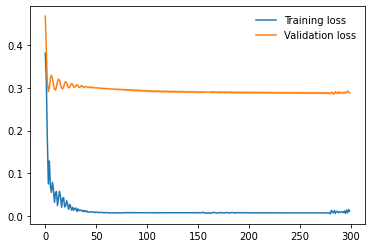

In [0]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

**Linear Regression**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics


from sklearn.linear_model import LinearRegression
%matplotlib inline

In [0]:
linearmodel = LinearRegression()

In [0]:
linearmodel.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
linearmodel.coef_

array([ 1.67405446e-02,  3.40190353e-02,  9.63140970e-02, -2.06018650e-02,
       -4.26326910e-03,  3.40513030e-02,  2.88610352e-02,  3.89228440e-02,
       -2.67197744e+04, -4.76899881e+06, -7.39238681e+05, -6.93855721e+04,
       -9.17616480e+05, -1.84116332e+05, -1.58078787e+05, -2.07394771e+04,
       -1.80911356e+05,  6.91191682e+06, -1.97474336e-02, -3.99275050e-02,
       -1.43275062e-01, -2.06157164e-02, -1.18601562e-02,  1.54638030e-01])

In [0]:
linearmodel.intercept_

0.25597915233013757

In [0]:
LR_prediction=linearmodel.predict(x_test)

In [0]:
LR_predictions=LR_prediction.round(3)
LR_predictions

array([0.242, 0.208, 0.346, 0.128, 0.013, 0.005, 0.2  , 0.544, 0.085,
       0.612, 0.01 , 0.029, 0.146, 0.732, 0.186])

In [0]:
print(metrics.mean_absolute_error(LR_predictions , y_test))              # Accuracy for MAE Loss function = 92%

0.08050620683315667


In [0]:
print(metrics.mean_squared_error(LR_predictions, y_test))                # Accuracy for MSE loss function  = 96%

0.0409975517408148


In [0]:
print(np.sqrt(metrics.mean_squared_error(LR_predictions, y_test)))       # Accuracy for RMSE = 80%

0.20247852167776906


**Support Vector Regressor**

In [0]:
from sklearn.svm import SVR

In [0]:
reg1 = SVR(C=3.0, epsilon=0.01)

In [0]:
reg1.fit(x_train, y_train)

SVR(C=3.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
reg1.get_params()

{'C': 3.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.01,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [0]:
SVR_Predictions = reg1.predict(x_test)

In [0]:
SVR_Predictions

array([0.23367256, 0.22141789, 0.36614912, 0.12986522, 0.0441315 ,
       0.010088  , 0.20079195, 0.40102536, 0.08713623, 0.42489483,
       0.01109835, 0.01910238, 0.15499139, 0.71621796, 0.18969034])

In [0]:
y_test

0     0.231181
1     0.210075
2     0.353434
3     0.122302
4     0.034435
5     0.004638
6     0.192678
7     1.167621
8     0.080883
9     1.085594
10    0.014811
11    0.032770
12    0.153125
13    0.762239
14    0.180829
dtype: float64

In [0]:
print(metrics.mean_squared_error(SVR_Predictions, y_test))                        # Accuracy for MSE = 94%

0.06847837297011257


In [0]:
print(np.sqrt(metrics.mean_squared_error(SVR_Predictions, y_test)))               # RMSE = 74%

0.26168372698758435


In [0]:
print(metrics.mean_absolute_error(SVR_Predictions , y_test))                     # MAE = 89%

0.10433666701647906


**Random Forest Regressor**

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [0]:
reg2 = RandomForestRegressor(max_depth = 2, max_leaf_nodes= 10,random_state=0, verbose =2 , criterion='mse')

In [0]:
reg2.fit(x_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=10,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=2, warm_start=False)

In [0]:
RFR_predictions = reg2.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [0]:
RFR_predictions

array([0.25211588, 0.21585842, 0.38755017, 0.07966818, 0.05309321,
       0.05309321, 0.16663643, 0.32415149, 0.05796582, 0.33562001,
       0.05309321, 0.05309321, 0.11944078, 0.64146985, 0.15187872])

In [0]:
print(metrics.mean_squared_error(RFR_predictions, y_test))                          

0.08664608232200659


**Decision Tree Regressor**


In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [0]:
regressor = DecisionTreeRegressor(random_state=0, max_depth=100,max_leaf_nodes=1000, criterion='mae')

In [0]:
regressor1 =regressor.fit(x_train, y_train)

In [0]:
DT_predictions = regressor.predict(x_test)

In [0]:
regressor.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mae',
 'max_depth': 100,
 'max_features': None,
 'max_leaf_nodes': 1000,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [0]:
print(metrics.mean_squared_error(DT_predictions, y_test))                           

0.07748278987064608


**Gradient Boosting algorithm**

In [0]:
from sklearn import datasets, ensemble

In [0]:
regg = ensemble.GradientBoostingRegressor(loss = 'ls', verbose=2, criterion= 'mae')

In [0]:
regg.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.0648            0.22s
         2           0.0525            0.25s
         3           0.0426            0.23s
         4           0.0346            0.22s
         5           0.0281            0.24s
         6           0.0229            0.22s
         7           0.0186            0.20s
         8           0.0151            0.19s
         9           0.0123            0.18s
        10           0.0100            0.17s
        11           0.0081            0.16s
        12           0.0066            0.15s
        13           0.0054            0.14s
        14           0.0044            0.14s
        15           0.0035            0.14s
        16           0.0029            0.14s
        17           0.0024            0.14s
        18           0.0019            0.13s
        19           0.0016            0.13s
        20           0.0013            0.13s
        21           0.0011            0.13s
        2

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=2, warm_start=False)

In [0]:
regg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'mae',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 2,
 'warm_start': False}

In [0]:
GB_predictions = regg.predict(x_test)

In [0]:
GB_predictions

array([0.24554395, 0.23233527, 0.35074099, 0.11747024, 0.03266738,
       0.00784359, 0.18011128, 0.33434463, 0.07513361, 0.44396909,
       0.00904313, 0.02851349, 0.14783902, 0.69319339, 0.17167058])